<a href="https://colab.research.google.com/github/joaojulio/Kaggle-Projects/blob/master/TitanicKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Dictionary
[Kaggle Titanic data dicitionary](https://www.kaggle.com/c/titanic/data)

#First Attempt

##Imports

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('/content/drive/My Drive/Kaggle/Titanic/train.csv')

In [ ]:
df.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

##DAE

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 46.3MB 602kB/s
     |████████████████████████████████| 61kB 3.6MB/s 
     |████████████████████████████████| 604kB 8.1MB/s 
     |████████████████████████████████| 3.1MB 10.6MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     |████████████████████████████████| 296kB 28.9MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=d103aec33376a38203567c1856f58e6d8babbcbb2864c883ace8af2666022559
  Stored in directory: /tmp/pip-ephem-wheel-cache-64u1yg9v/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=c336922feb140c8c68eccf881ffb1a3f1cdea294d97bb1b95e6b03013140f24e
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=aad9760ca8c2f6badd31b96367d0d64f1a25d69188073cfe389d1

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title='Report - Titanic profile', html={'style':{'full_width':True}})

In [ ]:
profile

In [ ]:
profile.to_file(output_file='ReportTitanic-01.html')

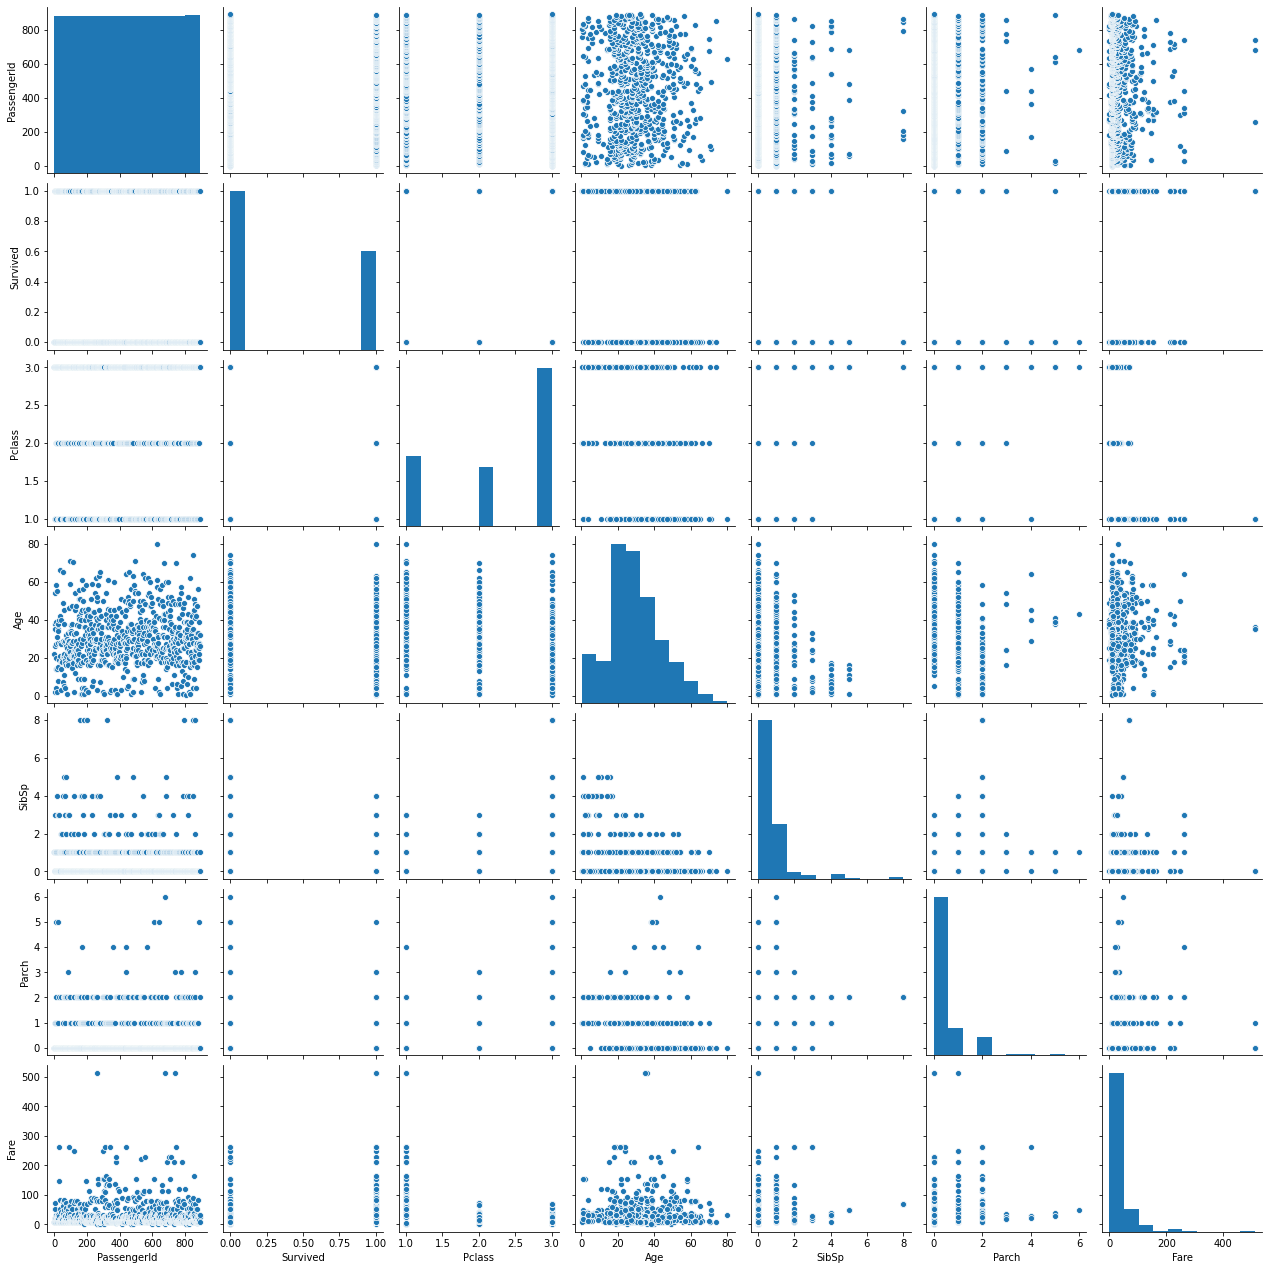

In [ ]:
sns.pairplot(df)

##First Impressions

Observations:
1. Cabin with too many missing values (>=70%);
2. Around 20% of missing values in Age;
3. More than half of passengers are in PClass 3 (55%);
4. 64.8% are male;
5. 20-40 years: high concentration;
6. Around 70% of passengers don't have relatives (68.2% of zeros in SibSp);
7. There's no much families aboord (around 76% of zeros in Parch).
8. 342 survivers (38.4%)

Correlations with survived
1. Fare
2. Pclass
3. Sex


##Dealing with missing values

###Age

In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [5]:
trainframe = df.drop(['Name','SibSp','Parch','Ticket'],axis=1)

In [ ]:
trainframe.head()

PassengerId  Survived  Pclass     Sex   Age     Fare Cabin Embarked
0            1         0       3    male  22.0   7.2500   NaN        S
1            2         1       1  female  38.0  71.2833   C85        C
2            3         1       3  female  26.0   7.9250   NaN        S
3            4         1       1  female  35.0  53.1000  C123        S
4            5         0       3    male  35.0   8.0500   NaN        S

In [ ]:
trainframe.groupby('Pclass')['Age'].mean().round(0)

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [ ]:
trainframe['Age'].isnull().sum()

177

In [ ]:
trainframe[trainframe['Pclass']==1]['Age'].isnull().sum()

30

In [ ]:
trainframe[trainframe['Pclass']==2]['Age'].isnull().sum()

11

In [ ]:
trainframe[trainframe['Pclass']==3]['Age'].isnull().sum()

136

In [ ]:
fillingAgeTest = trainframe[(trainframe['Pclass']==2) & (trainframe['Age'].isnull())]

In [ ]:
fillingAgeTest

PassengerId  Survived  Pclass     Sex  Age     Fare Cabin Embarked
17            18         1       2    male  NaN  13.0000   NaN        S
181          182         0       2    male  NaN  15.0500   NaN        C
277          278         0       2    male  NaN   0.0000   NaN        S
303          304         1       2  female  NaN  12.3500  E101        Q
413          414         0       2    male  NaN   0.0000   NaN        S
466          467         0       2    male  NaN   0.0000   NaN        S
481          482         0       2    male  NaN   0.0000   NaN        S
547          548         1       2    male  NaN  13.8625   NaN        C
596          597         1       2  female  NaN  33.0000   NaN        S
674          675         0       2    male  NaN   0.0000   NaN        S
732          733         0       2    male  NaN   0.0000   NaN        S

In [6]:
pclassAgeAv = trainframe.groupby('Pclass')['Age'].mean().round(0)

In [ ]:
pclassAgeAv[2]

30.0

In [7]:
def fill_age_missing(Pclass,Age):
  if np.isnan(Age):
    return pclassAgeAv[Pclass]
  else:
    return Age

In [ ]:
fillingAgeTest['Age'] = fillingAgeTest.apply(lambda x: fill_age_missing(x['Pclass'], x['Age']),axis=1)

In [ ]:
fillingAgeTest

PassengerId  Survived  Pclass     Sex   Age     Fare Cabin Embarked
17            18         1       2    male  30.0  13.0000   NaN        S
181          182         0       2    male  30.0  15.0500   NaN        C
277          278         0       2    male  30.0   0.0000   NaN        S
303          304         1       2  female  30.0  12.3500  E101        Q
413          414         0       2    male  30.0   0.0000   NaN        S
466          467         0       2    male  30.0   0.0000   NaN        S
481          482         0       2    male  30.0   0.0000   NaN        S
547          548         1       2    male  30.0  13.8625   NaN        C
596          597         1       2  female  30.0  33.0000   NaN        S
674          675         0       2    male  30.0   0.0000   NaN        S
732          733         0       2    male  30.0   0.0000   NaN        S

In [9]:
trainframe['Age'] = trainframe.apply(lambda x: fill_age_missing(x['Pclass'], x['Age']),axis=1)

In [10]:
trainframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###Cabin

In [ ]:
trainframe['Cabin'].nunique()

147

In [ ]:
trainframe['Cabin'].sort_values().unique()

array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
       'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
       'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
       'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
       'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
       'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
       'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
       'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
       'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',
       'E17',

In [ ]:
trainframe[trainframe['Cabin']=='T']

PassengerId  Survived  Pclass   Sex   Age  Fare Cabin Embarked
339          340         0       1  male  45.0  35.5     T        S

In [ ]:
trainframe['Cabin'][303][0]

'E'

In [11]:
trainframe['LetterCabin'] = trainframe['Cabin'].str[0]

In [ ]:
trainframe.head()

PassengerId  Survived  Pclass     Sex  ...     Fare  Cabin Embarked LetterCabin
0            1         0       3    male  ...   7.2500    NaN        S         NaN
1            2         1       1  female  ...  71.2833    C85        C           C
2            3         1       3  female  ...   7.9250    NaN        S         NaN
3            4         1       1  female  ...  53.1000   C123        S           C
4            5         0       3    male  ...   8.0500    NaN        S         NaN

[5 rows x 9 columns]

In [ ]:
trainframe.drop('Cabin', axis=1)

PassengerId  Survived  Pclass     Sex   Age     Fare Embarked LetterCabin
0              1         0       3    male  22.0   7.2500        S         NaN
1              2         1       1  female  38.0  71.2833        C           C
2              3         1       3  female  26.0   7.9250        S         NaN
3              4         1       1  female  35.0  53.1000        S           C
4              5         0       3    male  35.0   8.0500        S         NaN
..           ...       ...     ...     ...   ...      ...      ...         ...
886          887         0       2    male  27.0  13.0000        S         NaN
887          888         1       1  female  19.0  30.0000        S           B
888          889         0       3  female  25.0  23.4500        S         NaN
889          890         1       1    male  26.0  30.0000        C           C
890          891         0       3    male  32.0   7.7500        Q         NaN

[891 rows x 8 columns]

In [ ]:
trainframe.groupby('Pclass')['LetterCabin'].unique()

Pclass
1    [C, E, A, nan, B, D, T]
2             [nan, D, F, E]
3             [nan, G, F, E]
Name: LetterCabin, dtype: object

In [12]:
trainframe.drop(['LetterCabin', 'Cabin'], axis=1, inplace=True)

In [ ]:
trainframe.head()

PassengerId  Survived  Pclass     Sex   Age     Fare Embarked
0            1         0       3    male  22.0   7.2500        S
1            2         1       1  female  38.0  71.2833        C
2            3         1       3  female  26.0   7.9250        S
3            4         1       1  female  35.0  53.1000        S
4            5         0       3    male  35.0   8.0500        S

In [ ]:
trainframe.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       2
dtype: int64

In [13]:
trainframe = trainframe.dropna()

In [14]:
trainframe.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
dtype: int64

##Data PreProcessing

###Sex

In [15]:
maleGender = pd.get_dummies(trainframe['Sex'],drop_first=True)

In [16]:
trainframe = pd.concat([trainframe.drop('Sex',axis=1),maleGender], axis=1)

In [ ]:
trainframe.head()

PassengerId  Survived  Pclass   Age     Fare Embarked  male
0            1         0       3  22.0   7.2500        S     1
1            2         1       1  38.0  71.2833        C     0
2            3         1       3  26.0   7.9250        S     0
3            4         1       1  35.0  53.1000        S     0
4            5         0       3  35.0   8.0500        S     1

###Embarked

In [17]:
portOfEmbarkation = pd.get_dummies(trainframe['Embarked'])

In [18]:
trainframe = pd.concat([trainframe.drop('Embarked',axis=1),portOfEmbarkation],axis=1)

In [ ]:
trainframe.head()

PassengerId  Survived  Pclass   Age     Fare  male  C  Q  S
0            1         0       3  22.0   7.2500     1  0  0  1
1            2         1       1  38.0  71.2833     0  1  0  0
2            3         1       3  26.0   7.9250     0  0  0  1
3            4         1       1  35.0  53.1000     0  0  0  1
4            5         0       3  35.0   8.0500     1  0  0  1

In [ ]:
trainframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   Fare         889 non-null    float64
 5   male         889 non-null    uint8  
 6   C            889 non-null    uint8  
 7   Q            889 non-null    uint8  
 8   S            889 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 45.1 KB


##Second Report

In [ ]:
profileTwo = ProfileReport(trainframe, title='Second Report - Titanic profile', html={'style':{'full_width':True}})

In [ ]:
profileTwo.to_file(output_file='ReportTitanic-02.html')

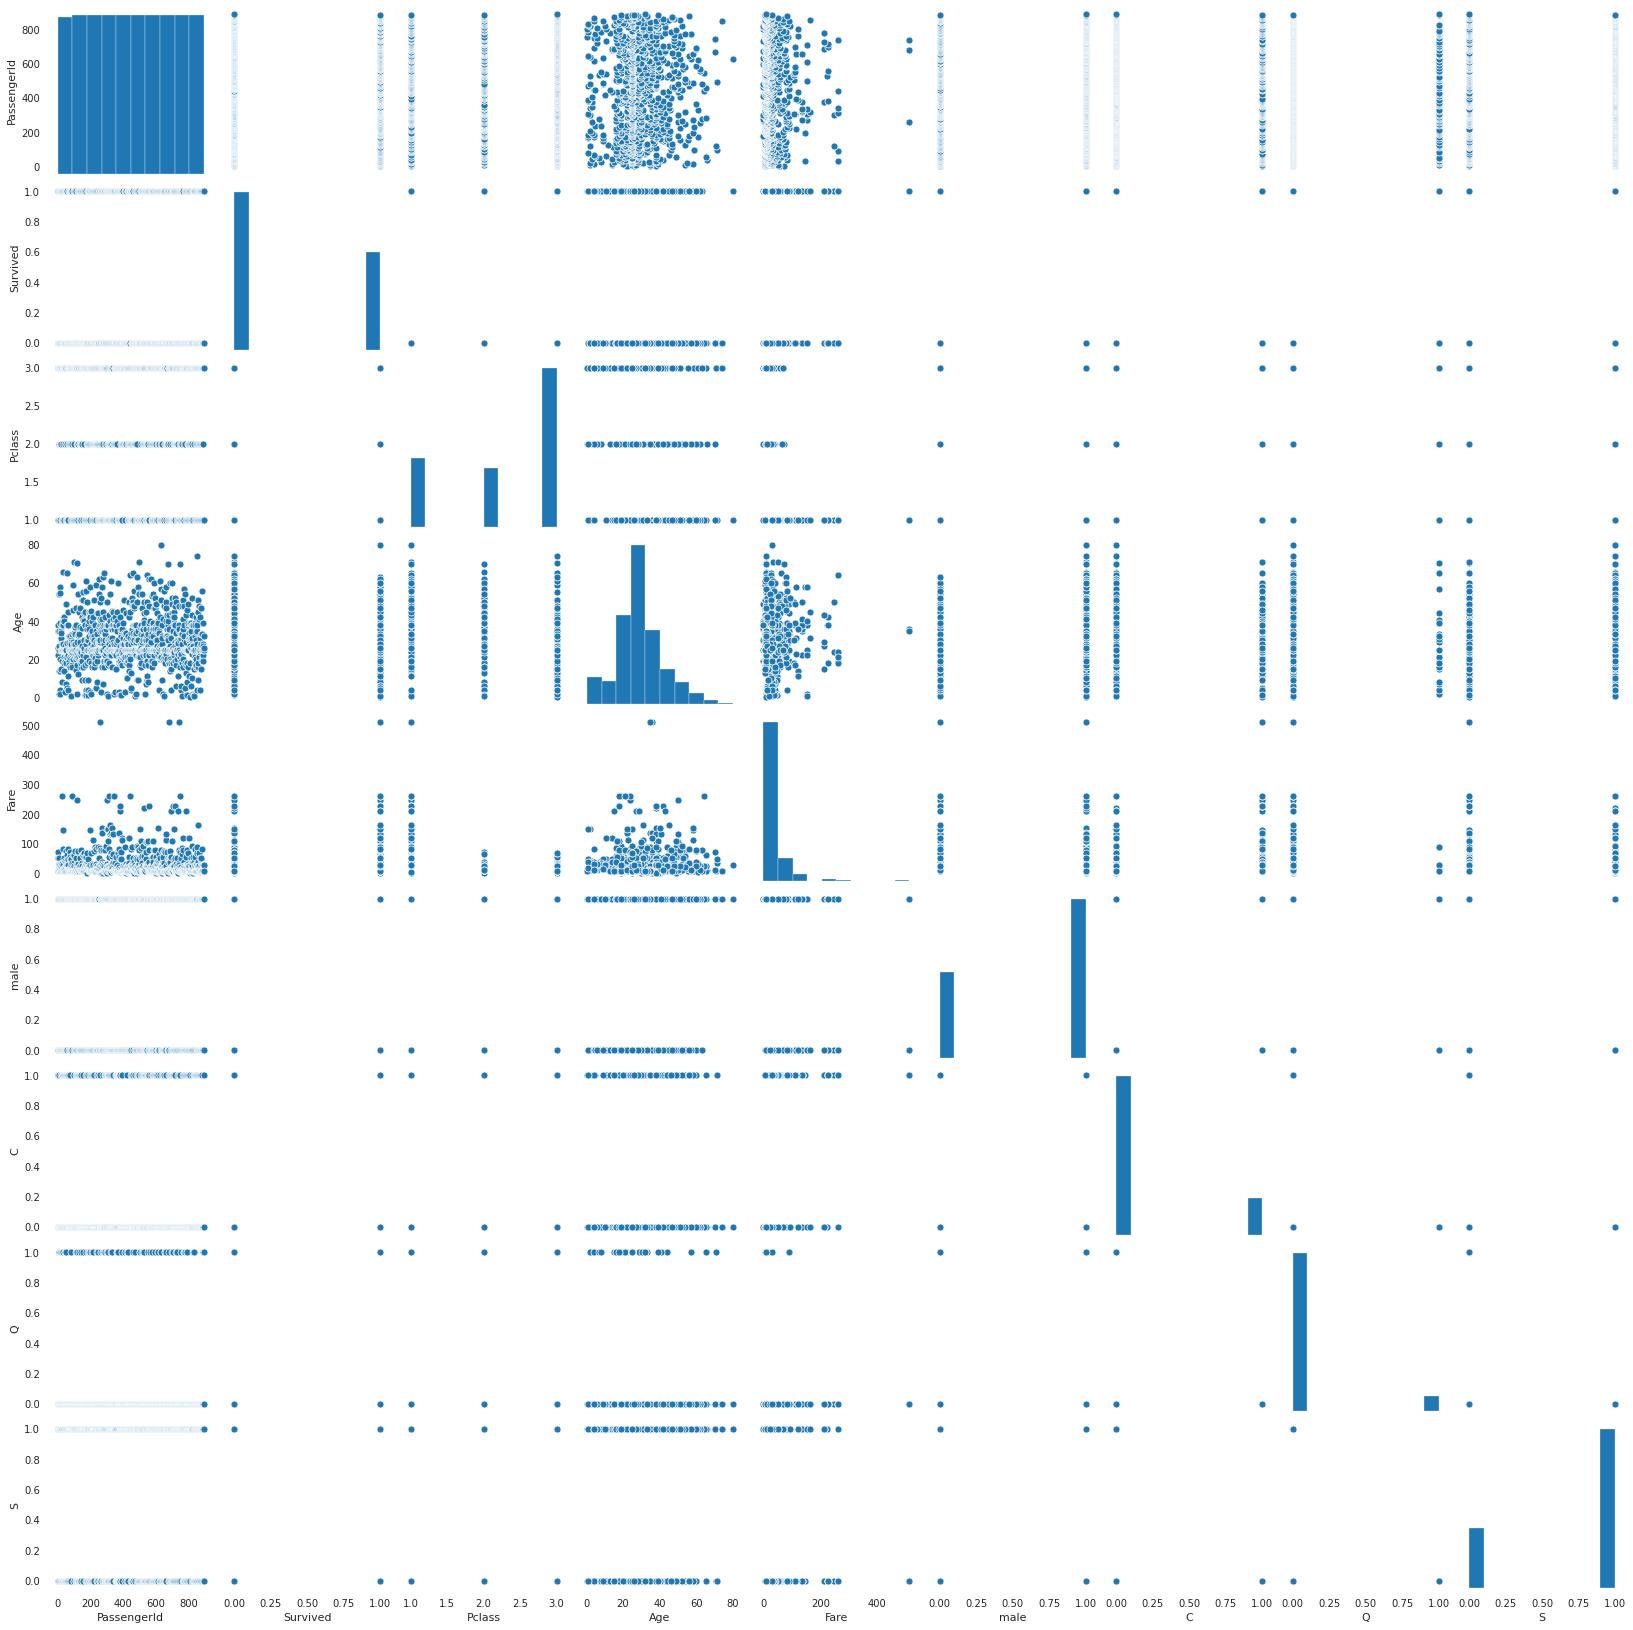

In [ ]:
sns.pairplot(trainframe)

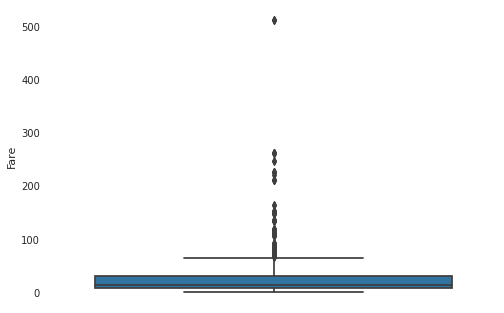

In [ ]:
sns.boxplot(y='Fare', data=trainframe)

In [ ]:
fareOutliers = trainframe[trainframe['Fare']>400]

In [ ]:
fareOutliers

PassengerId  Survived  Pclass   Age      Fare  male  C  Q  S
258          259         1       1  35.0  512.3292     0  1  0  0
679          680         1       1  36.0  512.3292     1  1  0  0
737          738         1       1  35.0  512.3292     1  1  0  0

In [ ]:
fareOutliers = trainframe[trainframe['Fare']>400].index
trainframe = trainframe.drop(fareOutliers)

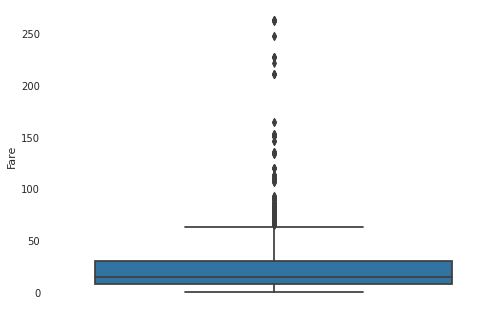

In [ ]:
sns.boxplot(y='Fare', data=trainframe)

In [ ]:
trainframe[trainframe['Fare']>200]['PassengerId'].nunique()

17

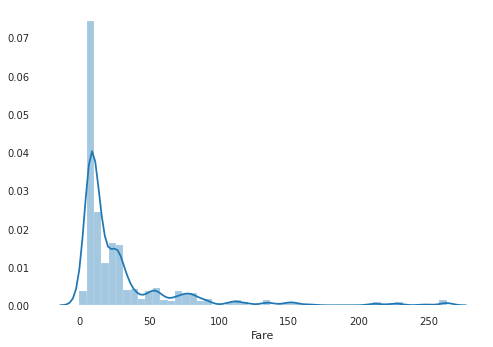

In [ ]:
sns.distplot(trainframe['Fare'])

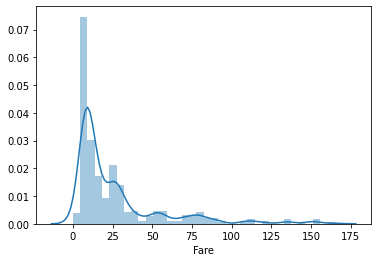

In [ ]:
fareOutliers = trainframe[trainframe['Fare']>200].index
trainframe = trainframe.drop(fareOutliers)
sns.distplot(trainframe['Fare'])

In [ ]:
trainframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  869 non-null    int64  
 1   Survived     869 non-null    int64  
 2   Pclass       869 non-null    int64  
 3   Age          869 non-null    float64
 4   Fare         869 non-null    float64
 5   male         869 non-null    uint8  
 6   C            869 non-null    uint8  
 7   Q            869 non-null    uint8  
 8   S            869 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 44.1 KB


In [ ]:
trainframe['Age'] = trainframe['Age'].astype(int)

In [ ]:
trainframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  869 non-null    int64  
 1   Survived     869 non-null    int64  
 2   Pclass       869 non-null    int64  
 3   Age          869 non-null    int64  
 4   Fare         869 non-null    float64
 5   male         869 non-null    uint8  
 6   C            869 non-null    uint8  
 7   Q            869 non-null    uint8  
 8   S            869 non-null    uint8  
dtypes: float64(1), int64(4), uint8(4)
memory usage: 44.1 KB


##Train Test Split

[sickit-learn algorithms](https://scikit-learn.org/stable/_static/ml_map.png)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = trainframe.drop(['Survived','Age','Fare'],axis=1)
y = trainframe['Survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

##Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logmodel = LogisticRegression()

In [24]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred = logmodel.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       163
           1       0.77      0.66      0.71       104

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267

[[142  21]
 [ 35  69]]


##K Nearest Neighbors - KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
knnpred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,knnpred))
print(confusion_matrix(y_test,knnpred))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       163
           1       0.47      0.43      0.45       104

    accuracy                           0.59       267
   macro avg       0.57      0.56      0.56       267
weighted avg       0.59      0.59      0.59       267

[[113  50]
 [ 59  45]]


In [29]:
error_rate =[]

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

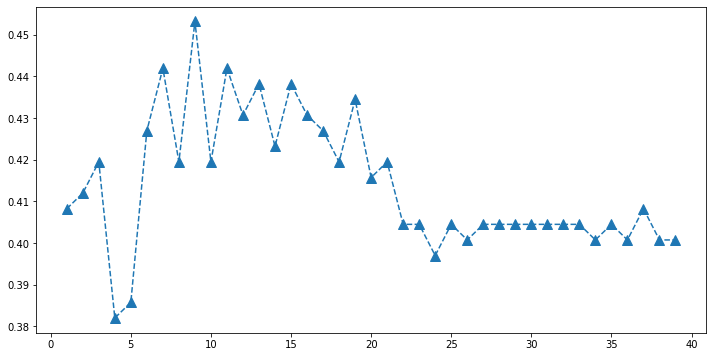

In [30]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error_rate,ls='--',marker='^',markersize=10)

In [31]:
knn = KNeighborsClassifier(n_neighbors=24)

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [33]:
knnpredn24 = knn.predict(X_test)

In [34]:
print(classification_report(y_test,knnpredn24))
print(confusion_matrix(y_test,knnpredn24))

              precision    recall  f1-score   support

           0       0.61      0.94      0.74       163
           1       0.44      0.08      0.13       104

    accuracy                           0.60       267
   macro avg       0.53      0.51      0.44       267
weighted avg       0.55      0.60      0.50       267

[[153  10]
 [ 96   8]]


##Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtree = DecisionTreeClassifier()

In [37]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
dtreepred = dtree.predict(X_test)

In [39]:
print(classification_report(y_test,dtreepred))
print(confusion_matrix(y_test,dtreepred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.78       163
           1       0.67      0.59      0.63       104

    accuracy                           0.73       267
   macro avg       0.71      0.70      0.71       267
weighted avg       0.72      0.73      0.72       267

[[133  30]
 [ 43  61]]


##Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier(n_estimators=100)

In [42]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
rfcpred = rfc.predict(X_test)

In [44]:
print(classification_report(y_test,rfcpred))
print(confusion_matrix(y_test,rfcpred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       163
           1       0.71      0.59      0.64       104

    accuracy                           0.75       267
   macro avg       0.74      0.72      0.72       267
weighted avg       0.74      0.75      0.74       267

[[138  25]
 [ 43  61]]


##Algorithms Comparison

In [ ]:
print('Logistic Regression')
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print('\n')
print('KNN')
print(classification_report(y_test,knnpredn25))
print(confusion_matrix(y_test,knnpredn25))
print('\n')
print('Decision Tree')
print(classification_report(y_test,dtreepred))
print(confusion_matrix(y_test,dtreepred))
print('\n')
print('Random Forest')
print(classification_report(y_test,rfcpred))
print(confusion_matrix(y_test,rfcpred))

Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       163
           1       0.77      0.66      0.71       104

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267

[[142  21]
 [ 35  69]]


KNN
              precision    recall  f1-score   support

           0       0.66      0.96      0.79       163
           1       0.80      0.23      0.36       104

    accuracy                           0.68       267
   macro avg       0.73      0.60      0.57       267
weighted avg       0.72      0.68      0.62       267

[[157   6]
 [ 80  24]]


Decision Tree
              precision    recall  f1-score   support

           0       0.76      0.82      0.78       163
           1       0.67      0.59      0.63       104

    accuracy                           0.73       267
   macro avg       0.71      0.70      0

##Test data

In [45]:
testdata = pd.read_csv('/content/drive/My Drive/Kaggle/Titanic/test.csv')

In [ ]:
testdata.head()

PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]

In [ ]:
trainframe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Fare', 'male', 'C', 'Q',
       'S'],
      dtype='object')

In [46]:
testframe = testdata.drop(['Name','SibSp','Parch','Cabin','Ticket','Age','Fare'],axis=1)

In [ ]:
testframe.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Embarked'], dtype='object')

In [ ]:
X.columns

Index(['PassengerId', 'Pclass', 'male', 'C', 'Q', 'S'], dtype='object')

In [47]:
portOfEmbarkationTest = pd.get_dummies(testframe['Embarked'])

In [48]:
testframe = pd.concat([testframe.drop('Embarked',axis=1),portOfEmbarkationTest],axis=1)

In [49]:
maleGenderTest = pd.get_dummies(testframe['Sex'],drop_first=True)

In [50]:
testframe = pd.concat([testframe.drop('Sex',axis=1),maleGenderTest], axis=1)

In [ ]:
testframe.head()

PassengerId  Pclass  C  Q  S  male
0          892       3  0  1  0     1
1          893       3  0  0  1     0
2          894       2  0  1  0     1
3          895       3  0  0  1     1
4          896       3  0  0  1     0

In [ ]:
testframe.isnull().sum()

PassengerId    0
Pclass         0
C              0
Q              0
S              0
male           0
dtype: int64

In [51]:
X_test = testframe

In [52]:
predictions = rfc.predict(X_test)

In [ ]:
output = pd.DataFrame({'PassengerId':testframe.PassengerId,'Survived':predictions})

In [ ]:
output.to_csv('joaojulio_submission.csv',index=False)

#Second Attempt

In [106]:
trainData = df

In [57]:
features = ['Pclass','Sex','SibSp','Parch']

In [55]:
y = trainData['Survived']

In [69]:
X = pd.get_dummies(trainData[features])
X_test = pd.get_dummies(testdata[features])

In [70]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
SecPredictions = rfc.predict(X_test)

In [61]:
output = pd.DataFrame({'PassengerId':testdata.PassengerId,'Survived':SecPredictions})

In [62]:
output.to_csv('joaojulio_submission.csv',index=False)

In [75]:
newfeatures = ['Pclass','Sex','Embarked']

In [76]:
X = pd.get_dummies(trainData[newfeatures])
X_test = pd.get_dummies(testdata[newfeatures])

In [66]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
SecPredictions = rfc.predict(X_test)

In [68]:
output = pd.DataFrame({'PassengerId':testdata.PassengerId,'Survived':SecPredictions})
output.to_csv('joaojulio_submission.csv',index=False)

In [74]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

In [77]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [78]:
SecPredictions = rfc.predict(X_test)

In [79]:
output = pd.DataFrame({'PassengerId':testdata.PassengerId,'Survived':SecPredictions})
output.to_csv('joaojulio_submission.csv',index=False)

##Changing Test data

In [80]:
testdata['Age'] = testdata.apply(lambda x: fill_age_missing(x['Pclass'], x['Age']),axis=1)

In [81]:
testdata.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [89]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [102]:
testdata['Age'].astype(int)

0      34
1      47
2      62
3      27
4      22
       ..
413    25
414    39
415    38
416    25
417    25
Name: Age, Length: 418, dtype: int64

In [103]:
newfeatures = ['Pclass','Sex','Embarked']

In [108]:
trainData_dummies = pd.get_dummies(trainData[newfeatures])
trainData = pd.concat([trainData.drop(['Pclass','Sex','Embarked'],axis=1),trainData_dummies],axis=1)

In [119]:
trainData = trainData.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin'],axis=1)

In [124]:
trainData.isnull().sum()

PassengerId      0
Survived         0
Age            177
Pclass           0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [125]:
trainData['Age'] = trainData.apply(lambda x: fill_age_missing(x['Pclass'], x['Age']),axis=1)

In [126]:
trainData['Age'].astype(int)

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    25
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [112]:
testdata_dummies = pd.get_dummies(testdata[newfeatures])
testdata = pd.concat([testdata.drop(['Pclass','Sex','Embarked'],axis=1),testdata_dummies],axis=1)

In [120]:
testdata = testdata.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin'],axis=1)

In [130]:
X = trainData.drop('Survived',axis=1)
X_test = testdata

In [122]:
y = trainData['Survived']

In [131]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [132]:
SecPredictions = rfc.predict(X_test)

In [133]:
output = pd.DataFrame({'PassengerId':testdata.PassengerId,'Survived':SecPredictions})
output.to_csv('joaojulio_submission.csv',index=False)